## Formateo de Resultados

* Fecha: 2022-02-22
* Coder: Lenin G. Falconi
* Obtejivo: Formatear los resultados generados en el modelo 2022 de la EPN para su consumo por parte de procesos

In [143]:
import pandas as pd
import numpy as np
import os
dir_root = os.getcwd()
dir_root

'c:\\Users\\falconiel\\PycharmProjects\\EPN_Fiscales\\Proyecto_Fiscal-a'

Existen dos juegos de resultados localizados en Resultados/Modelo y Resultados/Predicciones


**Resultados Modelo*
Contienen dos hojas de Excel:
* Resumen: Contiene los valores a reportar en el déficit de fiscales. Posiblemente se tiene que corregir la cantidad de fiscales actuales porque seguro se estimo con los valores del distributivo de talento humano que estaban incorrectamente realizados
* Fiscalias: Contiene la distribución o asignación de Fiscales a Fiscalía

In [144]:
os.listdir(os.path.join(dir_root, 'Resultados/Modelo/'))

['Resultados_AZUAY.xlsx',
 'Resultados_BOLIVAR.xlsx',
 'Resultados_CARCHI.xlsx',
 'Resultados_CAÑAR.xlsx',
 'Resultados_CHIMBORAZO.xlsx',
 'Resultados_COTOPAXI.xlsx',
 'Resultados_EL ORO.xlsx',
 'Resultados_ESMERALDAS.xlsx',
 'Resultados_GALAPAGOS.xlsx',
 'Resultados_GUAYAS.xlsx',
 'Resultados_IMBABURA.xlsx',
 'Resultados_LOJA.xlsx',
 'Resultados_LOS RIOS.xlsx',
 'Resultados_MANABI.xlsx',
 'Resultados_MORONA SANTIAGO.xlsx',
 'Resultados_NAPO.xlsx',
 'Resultados_ORELLANA.xlsx',
 'Resultados_PASTAZA.xlsx',
 'Resultados_PICHINCHA.xlsx',
 'Resultados_SANTA ELENA.xlsx',
 'Resultados_SANTO DOMINGO DE LOS TSACHILAS.xlsx',
 'Resultados_SUCUMBIOS.xlsx',
 'Resultados_TUNGURAHUA.xlsx',
 'Resultados_ZAMORA CHINCHIPE.xlsx']

In [145]:
os.listdir(os.path.join(dir_root, 'Resultados/Prediccion/'))

['AZUAY.xlsx',
 'BOLIVAR.xlsx',
 'CARCHI.xlsx',
 'CAÑAR.xlsx',
 'CHIMBORAZO.xlsx',
 'COTOPAXI.xlsx',
 'EL ORO.xlsx',
 'ESMERALDAS.xlsx',
 'GALAPAGOS.xlsx',
 'GUAYAS.xlsx',
 'IMBABURA.xlsx',
 'LOJA.xlsx',
 'LOS RIOS.xlsx',
 'MANABI.xlsx',
 'MORONA SANTIAGO.xlsx',
 'NAPO.xlsx',
 'ORELLANA.xlsx',
 'PASTAZA.xlsx',
 'PICHINCHA.xlsx',
 'SANTA ELENA.xlsx',
 'SANTO DOMINGO DE LOS TSACHILAS.xlsx',
 'SUCUMBIOS.xlsx',
 'TUNGURAHUA.xlsx',
 'ZAMORA CHINCHIPE.xlsx']

## Generación de Tabla de Déficit de Fiscales por Cantón y por Provincia

Para la generación de estos resultados voy a generar una tabla maestra con los datos presentados en la ficha Resumen. Incrementaré el código de Cantón y adicional traeré la cantidad de fiscales leída del archivo que se considera correcto para realizar el cálculo de los déficit

In [146]:
from tqdm import tqdm
import re
regex = r"Resultados\_([\wÁÉÍÓÚ Ñ]+).xlsx"  
deficit_fiscales_dict = {}
for arch in tqdm(os.listdir(os.path.join(dir_root, 'Resultados/Modelo/'))):
    file_path = os.path.join(dir_root, 'Resultados/Modelo/', arch)
    provincia_name = re.findall(regex, arch, re.MULTILINE)[0]
    provincia_df = pd.read_excel(file_path, sheet_name='Resumen')
    provincia_df['Provincia'] = provincia_name
    deficit_fiscales_dict[provincia_name] = provincia_df


100%|██████████| 24/24 [00:00<00:00, 33.18it/s]


In [147]:
deficit_fiscales_dict['PICHINCHA']

,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia
0,QUITO,2857775,53315,188,174,-14,6.578544,6.088653,229,41,8.013227,PICHINCHA
1,RUMINAHUI,118593,4704,0,17,17,0.000000,14.330000,17,17,14.330000,PICHINCHA
2,MEJIA,111128,1926,0,8,8,0.000000,7.200000,9,9,8.100000,PICHINCHA
3,CAYAMBE,110607,1584,10,7,-3,9.041019,6.330000,9,-1,8.140000,PICHINCHA
4,PEDRO MONCAYO,44465,718,0,3,3,0.000000,6.746880,4,4,8.995839,PICHINCHA
5,PUERTO QUITO,25593,741,0,3,3,0.000000,11.721955,3,3,11.721955,PICHINCHA
6,SAN MIGUEL DE LOS BANCOS,30790,635,0,3,3,0.000000,9.743423,3,3,9.743423,PICHINCHA
7,PEDRO VICENTE MALDONADO,17641,373,0,2,2,0.000000,11.337226,2,2,11.337226,PICHINCHA


In [148]:
deficit_cantones = pd.concat([deficit_fiscales_dict[x] for x in deficit_fiscales_dict.keys()])
deficit_cantones.reset_index(inplace=True)
deficit_cantones.shape

(221, 13)

## Extracción del Código de Canton
El diccionario de códigos de canton se obtiene por medio de sql con el siguiente código. No obstante este repo no tiene conexión a las librerías internas por lo que se consulta el archivo csv con la información directamente

    from snippets.utils import conectar_sql
    from sqlalchemy import text
    conn = conectar_sql()
    query = """
    SELECT 
    cantones.can_descripcion as CANTON,
    cantones.can_iso as CODIGO_CANTON
    FROM fiscalia.gen_canton AS cantones;
    """

    codigos_cantones = pd.read_sql(text(query), conn)
    codigos_cantones

In [149]:
codigos_cantones = pd.read_csv(os.path.join(dir_root, 'diccionario_codigoCantones.csv'),
                               converters={'CODIGO_CANTON':str})
codigos_cantones.sample(5)

,CANTON,CODIGO_CANTON
204,YANTZAZA,1905
143,MONTECRISTI,1309
163,SUCUA,1406
56,ATAHUALPA,0703
89,PEDRO CARBO,0914


In [150]:
codigos_cantones_dict = dict(zip(codigos_cantones.CANTON, codigos_cantones.CODIGO_CANTON))
list(codigos_cantones_dict.items())[:10]

[('CHILLANES', '0202'),
 ('CUENCA', '0101'),
 ('GIRON', '0102'),
 ('GUALACEO', '0103'),
 ('NABON', '0104'),
 ('PAUTE', '0105'),
 ('PUCARA', '0106'),
 ('SAN FERNANDO', '0107'),
 ('SANTA ISABEL', '0108'),
 ('SIGSIG', '0109')]

Sustituyendo algunos cantones para que cuadren con las claves del diccionario

In [151]:
deficit_cantones.Cantones[deficit_cantones.Cantones=="ONA"] = "OÑA"
deficit_cantones.Cantones[deficit_cantones.Cantones=="ALFREDO BAQUERIZO MORENO"] = "ALFREDO BAQUERIZO MORENO ( JUJAN )"
deficit_cantones.Cantones[deficit_cantones.Cantones=="ANTONIO ELIZALDE"] = "GENERAL ANTONIO ELIZALDE (BUCAY)"
deficit_cantones.Cantones[deficit_cantones.Cantones=="EMPALME"] = "EL EMPALME"
deficit_cantones.Cantones[deficit_cantones.Cantones=="MARCELINO MARIDUENA"] = "CORONEL MARCELINO MARIDUENA"
deficit_cantones.Cantones[deficit_cantones.Cantones=="BUENA FE"] = "SAN JACINTO DE BUENA FE"
deficit_cantones.Cantones[deficit_cantones.Cantones=="SANTIAGO (MENDEZ) DE PILLARO"] = "SANTIAGO DE PILLARO"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_8716/4077159468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones.Cantones[deficit_cantones.Cantones=="ONA"] = "OÑA"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_8716/4077159468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones.Cantones[deficit_cantones.Cantones=="ALFREDO BAQUERIZO MORENO"] = "ALFREDO BAQUERIZO MORENO ( JUJAN )"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_8716/4077159468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [152]:
deficit_cantones['CODCANTON'] = deficit_cantones.Cantones.apply(lambda x: codigos_cantones_dict[x] if x in codigos_cantones_dict.keys() else 'NO ENCUENTRO')
deficit_cantones.sample(10)

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia,CODCANTON
182,2,ARAJUNO,8351,192,0,1,1,0.000000,11.974614,1,1,11.974614,PASTAZA,1604
159,0,MORONA,59876,2515,7,10,3,11.690828,16.700000,10,3,16.700000,MORONA SANTIAGO,1401
156,19,JAMA,26831,266,0,1,1,0.000000,3.727032,3,3,11.181096,MANABI,1320
49,4,SAQUISILI,32286,381,0,2,2,0.000000,6.194635,3,3,9.291953,COTOPAXI,0506
2,2,CAMILO PONCE ENRIQUEZ,37420,938,1,3,2,2.672368,8.017103,3,2,8.017103,AZUAY,0115
175,4,CARLOS JULIO AROSEMENA TOLA,4588,201,0,1,1,0.000000,21.795990,1,1,21.795990,NAPO,1509
51,6,SIGCHOS,23914,288,0,1,1,0.000000,4.181651,2,2,8.363302,COTOPAXI,0507
40,5,GUAMOTE,59886,346,0,2,2,0.000000,3.339679,5,5,8.349197,CHIMBORAZO,0606
57,5,ARENILLAS,34389,887,4,3,-1,11.631626,8.723720,3,-1,8.723720,EL ORO,0702
185,1,RUMINAHUI,118593,4704,0,17,17,0.000000,14.330000,17,17,14.330000,PICHINCHA,1705


Buscando posibles errores bajo clave 'NO ENCUENTRO'

In [153]:
deficit_cantones[deficit_cantones.Cantones.str.contains("SANTIAGO")]

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia,CODCANTON
163,4,SANTIAGO (MENDEZ),11390,299,0,1,1,0.0,8.779631,1,1,8.779631,MORONA SANTIAGO,1405
211,8,SANTIAGO DE PILLARO,44558,0,0,0,0,0.0,0.000000,0,0,0.000000,TUNGURAHUA,1808


In [154]:
deficit_cantones.Cantones[deficit_cantones.CODCANTON=='NO ENCUENTRO'].tolist()

[]

## Corrección de la cantidad de Fiscales de acuedo al Reporte de la CJ

In [155]:
cantidad_fiscales = pd.read_excel(os.path.join(dir_root, 'cantidadFiscalesCantonJudicaturaCodigo.xlsx'),
                                  converters={'CODCANTON':str})
cantidad_fiscales.shape

(139, 4)

In [156]:
cantidad_fiscales.sample(5)

,PROVINCIA,CANTON,CODCANTON,CEDULA
87,MANABÍ,CHONE,1303,4
22,CHIMBORAZO,COLTA,0603,1
67,IMBABURA,SAN MIGUEL DE URCUQUI,1006,1
60,GUAYAS,SAMBORONDON,0916,2
66,IMBABURA,OTAVALO,1004,4


In [157]:
deficit_cantones_tmp = pd.merge(deficit_cantones, cantidad_fiscales, on='CODCANTON', how='left')
print(deficit_cantones.shape)
print(deficit_cantones_tmp.shape)

(221, 14)
(221, 17)


In [158]:
deficit_cantones_tmp.rename(columns={'CEDULA':'FISCALES_ACTUALES'}, inplace=True)
deficit_cantones_tmp.drop(columns=['Fiscales Actuales', 'PROVINCIA', 'CANTON'], inplace=True)
deficit_cantones_tmp.FISCALES_ACTUALES.fillna(0, inplace=True)
deficit_cantones_tmp

,index,Cantones,Poblacion,Delitos,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia,CODCANTON,FISCALES_ACTUALES
0,0,CUENCA,654431,11343,40,-5,6.876202,6.112180,53,8,8.098638,AZUAY,0101,39.0
1,1,GUALACEO,50448,757,3,3,0.000000,5.946717,5,5,9.911196,AZUAY,0103,2.0
2,2,CAMILO PONCE ENRIQUEZ,37420,938,3,2,2.672368,8.017103,3,2,8.017103,AZUAY,0115,0.0
3,3,SANTA ISABEL,21508,544,2,2,0.000000,9.298866,2,2,9.298866,AZUAY,0108,1.0
4,4,PAUTE,30014,486,2,2,0.000000,6.663557,3,3,9.995336,AZUAY,0105,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,4,CENTINELA DEL CONDOR,8541,283,1,0,11.708231,11.708231,1,0,11.708231,ZAMORA CHINCHIPE,1907,1.0
217,5,PALANDA,10421,235,1,1,0.000000,9.596008,1,1,9.596008,ZAMORA CHINCHIPE,1908,1.0
218,6,PAQUISHA,6156,163,1,1,0.000000,16.244314,1,1,16.244314,ZAMORA CHINCHIPE,1909,0.0
219,7,NANGARITZA,8233,180,1,1,0.000000,12.146241,1,1,12.146241,ZAMORA CHINCHIPE,1903,0.0


Reordenando las columnas

In [159]:
deficit_cantones_df = deficit_cantones_tmp.copy()
deficit_cantones_df = deficit_cantones_df.loc[:,['index', 
                                                 'CODCANTON', 
                                                 'Provincia', 
                                                 'Cantones', 
                                                 'Poblacion', 
                                                 'Delitos', 
                                                 'FISCALES_ACTUALES', 
                                                 'Tasa Actual',
                                                 'Fiscales x Carga', 
                                                 'Déficit x Carga', 
                                                 'Tasa x Carga', 
                                                 'Fiscales x Población',
                                                 'Déficit x Población', 
                                                 'Tasa x Población']]
deficit_cantones_df.sample(10)

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,FISCALES_ACTUALES,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
132,8,1202,LOS RIOS,BABA,44618,660,0.0,11.206240,3,-2,6.723744,4,-1,8.964992
48,3,0504,COTOPAXI,PUJILI,81955,729,2.0,0.000000,8,8,9.761454,8,8,9.761454
64,12,0703,EL ORO,ATAHUALPA,6612,71,0.0,15.124017,0,-1,0.000000,0,-1,0.000000
13,13,0112,AZUAY,EL PAN,3176,31,0.0,0.000000,0,0,0.000000,2,2,62.972292
133,9,1209,LOS RIOS,PALENQUE,24285,374,0.0,0.000000,2,2,8.235536,2,2,8.235536
142,5,1317,MANABI,PEDERNALES,65178,1460,2.0,0.000000,5,5,7.671300,6,6,9.205560
95,18,0913,GUAYAS,PALESTINA,18956,290,0.0,0.000000,1,1,5.275375,2,2,10.550749
211,8,1808,TUNGURAHUA,SANTIAGO DE PILLARO,44558,0,1.0,0.000000,0,0,0.000000,0,0,0.000000
55,3,0707,EL ORO,HUAQUILLAS,62094,1559,5.0,0.000000,10,7,11.270000,7,10,11.270000
207,4,1806,TUNGURAHUA,QUERO,21191,256,1.0,0.000000,1,1,4.718984,2,2,9.437969


In [160]:
deficit_cantones_df[deficit_cantones_df.Provincia=="ESMERALDAS"]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,FISCALES_ACTUALES,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
66,0,0801,ESMERALDAS,ESMERALDAS,224713,6212,18.0,10.68029,23,-1,10.235278,23,-1,10.235278
67,1,0804,ESMERALDAS,QUININDE,149872,2074,3.0,0.00000,7,7,4.670652,12,12,8.006832
68,2,0806,ESMERALDAS,ATACAMES,57014,1660,2.0,3.50791,6,4,10.523731,6,4,10.523731
69,3,0805,ESMERALDAS,SAN LORENZO,64490,1146,0.0,0.00000,4,4,6.202512,6,6,9.303768
70,4,0802,ESMERALDAS,ELOY ALFARO,46878,597,2.0,0.00000,2,2,4.266394,4,4,8.532787
71,5,0803,ESMERALDAS,MUISNE,31957,661,1.0,0.00000,3,3,9.387615,3,3,9.387615
72,6,0807,ESMERALDAS,RIO VERDE,32336,467,0.0,0.00000,2,2,6.185057,3,3,9.277585
73,7,2302,ESMERALDAS,LA CONCORDIA,54010,0,2.0,0.00000,5,5,9.257545,5,5,9.257545


## Recálculo de los Valores de Déficit

Debido al problema presentado con respecto a la cantidad de fiscales por canton, se debe recalcular los valores de *deficit x carga*, *deficit x poblacion*, *tasa_actual* 
Debido a errores que existen en los resultados proveídos en cuanto al símbolo usado para decimales ${,|.}$, procedo a recalcular las tasas en todos los resultados a fin de evitar estos errores

In [161]:
deficit_cantones_df['Tasa Actual'] = deficit_cantones_df.FISCALES_ACTUALES / deficit_cantones_df.Poblacion*1e5
deficit_cantones_df['Déficit x Carga'] = deficit_cantones_df['Fiscales x Carga'] - deficit_cantones_df['FISCALES_ACTUALES']
deficit_cantones_df['Déficit x Población'] = deficit_cantones_df['Fiscales x Población'] - deficit_cantones_df['FISCALES_ACTUALES']
# recalculo de tasas para mitigar errores
deficit_cantones_df['Tasa x Carga'] = deficit_cantones_df['Fiscales x Carga'] / deficit_cantones_df.Poblacion*1e5
deficit_cantones_df['Tasa x Población'] = deficit_cantones_df['Fiscales x Población'] / deficit_cantones_df.Poblacion*1e5
deficit_cantones_df.sample(10)

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,FISCALES_ACTUALES,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
149,12,1315,MANABI,TOSAGUA,43455,504,1.0,2.301231,2,1.0,4.602462,4,3.0,9.204925
26,4,0404,CARCHI,MIRA,12297,244,0.0,0.000000,1,1.0,8.132065,1,1.0,8.132065
29,1,0304,CAÑAR,LA TRONCAL,78976,2609,5.0,6.331037,9,4.0,11.395867,9,4.0,11.395867
52,0,0701,EL ORO,MACHALA,297055,9672,30.0,10.099140,35,5.0,11.782330,35,5.0,11.782330
17,2,0204,BOLIVAR,ECHANDíA,14467,427,1.0,6.912283,2,1.0,13.824566,2,1.0,13.824566
155,18,1307,MANABI,JUNIN,19335,331,1.0,5.171968,2,1.0,10.343936,2,1.0,10.343936
99,22,0927,GUAYAS,GENERAL ANTONIO ELIZALDE (BUCAY),13516,0,0.0,0.000000,0,0.0,0.000000,0,0.0,0.000000
181,1,1602,PASTAZA,MERA,18027,636,1.0,5.547235,3,2.0,16.641704,3,2.0,16.641704
24,2,0402,CARCHI,BOLIVAR,15953,342,1.0,6.268413,2,1.0,12.536827,2,1.0,12.536827
102,0,1001,IMBABURA,IBARRA,227201,5255,18.0,7.922500,21,3.0,9.242917,21,3.0,9.242917


In [162]:
deficit_cantones_df[deficit_cantones_df.Provincia=="ESMERALDAS"]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,FISCALES_ACTUALES,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
66,0,0801,ESMERALDAS,ESMERALDAS,224713,6212,18.0,8.010217,23,5.0,10.235278,23,5.0,10.235278
67,1,0804,ESMERALDAS,QUININDE,149872,2074,3.0,2.001708,7,4.0,4.670652,12,9.0,8.006832
68,2,0806,ESMERALDAS,ATACAMES,57014,1660,2.0,3.507910,6,4.0,10.523731,6,4.0,10.523731
69,3,0805,ESMERALDAS,SAN LORENZO,64490,1146,0.0,0.000000,4,4.0,6.202512,6,6.0,9.303768
70,4,0802,ESMERALDAS,ELOY ALFARO,46878,597,2.0,4.266394,2,0.0,4.266394,4,2.0,8.532787
71,5,0803,ESMERALDAS,MUISNE,31957,661,1.0,3.129205,3,2.0,9.387615,3,2.0,9.387615
72,6,0807,ESMERALDAS,RIO VERDE,32336,467,0.0,0.000000,2,2.0,6.185057,3,3.0,9.277585
73,7,2302,ESMERALDAS,LA CONCORDIA,54010,0,2.0,3.703018,5,3.0,9.257545,5,3.0,9.257545


In [163]:
deficit_cantones_df.rename(columns={'FISCALES_ACTUALES':'Fiscales Actuales'}, inplace=True)

In [166]:
deficit_cantones_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,221.0,5.909502,5.324980,0.0,2.000000,5.000000,8.000000,2.400000e+01
Poblacion,221.0,81205.054299,275448.661030,2444.0,13394.000000,29217.000000,64152.000000,2.857775e+06
Delitos,221.0,1635.176471,5370.988043,0.0,246.000000,465.000000,1032.000000,5.482600e+04
Fiscales Actuales,221.0,3.823529,15.848160,0.0,0.000000,1.000000,2.000000,1.780000e+02
Tasa Actual,221.0,3.274581,3.740827,0.0,0.000000,2.440364,5.547235,2.620888e+01
Fiscales x Carga,221.0,6.289593,17.668856,0.0,1.000000,2.000000,5.000000,1.780000e+02
Déficit x Carga,221.0,2.466063,3.938733,-4.0,1.000000,1.000000,3.000000,3.700000e+01
Tasa x Carga,221.0,9.917863,8.250689,0.0,6.150818,8.132065,11.553348,6.633939e+01
Fiscales x Población,221.0,7.416290,22.247135,0.0,2.000000,3.000000,6.000000,2.290000e+02
Déficit x Población,221.0,3.592760,7.155846,-3.0,1.000000,2.000000,4.000000,8.300000e+01


In [165]:
deficit_cantones_df[(deficit_cantones_df['Tasa x Carga']==max(deficit_cantones_df['Tasa x Carga']))|
                    (deficit_cantones_df['Tasa x Población']==max(deficit_cantones_df['Tasa x Población']))|
                    (deficit_cantones_df['Tasa Actual'] == max(deficit_cantones_df['Tasa Actual']))]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
21,6,0207,BOLIVAR,LAS NAVES,7631,255,2.0,26.208885,1,-1.0,13.104442,1,-1.0,13.104442
210,7,1804,TUNGURAHUA,MOCHA,7537,153,0.0,0.000000,5,5.0,66.339392,5,5.0,66.339392


Guardando los resultados de deficit de fiscales por canton

In [171]:
deficit_cantones_df.to_excel(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'deficitFiscalesCantonEPN2022.xlsx'))

## Cálculo de Provincias

Se realiza el resumen de la información para Provincias

In [172]:
deficit_cantones.columns

Index(['index', 'Cantones', 'Poblacion', 'Delitos', 'Fiscales Actuales',
       'Fiscales x Carga', 'Déficit x Carga', 'Tasa Actual', 'Tasa x Carga',
       'Fiscales x Población', 'Déficit x Población', 'Tasa x Población',
       'Provincia', 'CODCANTON'],
      dtype='object')

In [175]:
deficit_provincias = deficit_cantones_df.groupby(['Provincia'])[['Poblacion','Delitos','Fiscales Actuales', 'Fiscales x Carga', 'Déficit x Carga', 'Fiscales x Población', 'Déficit x Población']].sum().reset_index()
deficit_provincias["Tasa x Carga"] = deficit_provincias['Fiscales x Carga'] / deficit_provincias.Poblacion*1e5
deficit_provincias["Tasa x Poblacion"] = deficit_provincias['Fiscales x Población'] / deficit_provincias.Poblacion*1e5
deficit_provincias



,Provincia,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Fiscales x Población,Déficit x Población,Tasa x Carga,Tasa x Poblacion
0,AZUAY,905519,15822,45.0,59,14.0,78,33.0,6.515600,8.613845
1,BOLIVAR,215679,4405,14.0,21,7.0,21,7.0,9.736692,9.736692
2,CARCHI,191984,4222,14.0,18,4.0,18,4.0,9.375781,9.375781
3,CAÑAR,289098,6844,20.0,25,5.0,29,9.0,8.647587,10.031200
4,CHIMBORAZO,538345,9797,27.0,38,11.0,49,22.0,7.058671,9.101970
5,COTOPAXI,502092,7568,22.0,36,14.0,44,22.0,7.170001,8.763334
6,EL ORO,735341,20068,46.0,85,39.0,80,34.0,11.559263,10.879306
7,ESMERALDAS,661270,12817,28.0,52,24.0,62,34.0,7.863656,9.375898
8,GALAPAGOS,33946,1231,2.0,6,4.0,6,4.0,17.675131,17.675131
9,GUAYAS,4507515,86890,172.0,305,133.0,375,203.0,6.766478,8.319440


In [176]:
deficit_provincias.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Poblacion,24.0,747763.208333,1.049560e+06,33946.00000,199030.250000,480211.000000,679787.750000,4.507515e+06
Delitos,24.0,15057.250000,1.988423e+04,1231.00000,4628.500000,8529.000000,15835.000000,8.689000e+04
Fiscales Actuales,24.0,35.208333,4.725323e+01,2.00000,12.500000,23.500000,30.500000,1.940000e+02
Fiscales x Carga,24.0,57.916667,6.898199e+01,6.00000,20.500000,35.500000,61.500000,3.050000e+02
Déficit x Carga,24.0,22.708333,2.856796e+01,1.00000,7.750000,14.000000,23.250000,1.330000e+02
Fiscales x Población,24.0,68.291667,8.649729e+01,6.00000,20.750000,41.000000,74.250000,3.750000e+02
Déficit x Población,24.0,33.083333,4.377801e+01,1.00000,9.000000,19.500000,34.000000,2.030000e+02
Tasa x Carga,24.0,9.526168,2.830250e+00,6.51560,7.165806,8.758894,11.486893,1.767513e+01
Tasa x Poblacion,24.0,10.438559,2.352418e+00,8.06568,8.756216,9.556295,11.399473,1.767513e+01


In [177]:
deficit_provincias.columns

Index(['Provincia', 'Poblacion', 'Delitos', 'Fiscales Actuales',
       'Fiscales x Carga', 'Déficit x Carga', 'Fiscales x Población',
       'Déficit x Población', 'Tasa x Carga', 'Tasa x Poblacion'],
      dtype='object')

In [178]:
deficit_provincias = deficit_provincias.loc[:,['Provincia', 'Poblacion', 'Delitos', 'Fiscales Actuales', 'Fiscales x Carga', 'Déficit x Carga', 'Tasa x Carga', 'Fiscales x Población', 'Déficit x Población', 'Tasa x Poblacion']]
deficit_provincias.rename(columns={'Poblacion':'Población', 'Tasa x Poblacion':'Tasa x Población'}, inplace=True)
deficit_provincias

,Provincia,Población,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
0,AZUAY,905519,15822,45.0,59,14.0,6.515600,78,33.0,8.613845
1,BOLIVAR,215679,4405,14.0,21,7.0,9.736692,21,7.0,9.736692
2,CARCHI,191984,4222,14.0,18,4.0,9.375781,18,4.0,9.375781
3,CAÑAR,289098,6844,20.0,25,5.0,8.647587,29,9.0,10.031200
4,CHIMBORAZO,538345,9797,27.0,38,11.0,7.058671,49,22.0,9.101970
5,COTOPAXI,502092,7568,22.0,36,14.0,7.170001,44,22.0,8.763334
6,EL ORO,735341,20068,46.0,85,39.0,11.559263,80,34.0,10.879306
7,ESMERALDAS,661270,12817,28.0,52,24.0,7.863656,62,34.0,9.375898
8,GALAPAGOS,33946,1231,2.0,6,4.0,17.675131,6,4.0,17.675131
9,GUAYAS,4507515,86890,172.0,305,133.0,6.766478,375,203.0,8.319440


La cantidad Faltante de Fiscales a Nivel Nacional sería

In [184]:
print('Por poblacion: {}'.format(deficit_provincias['Fiscales x Población'].sum()))
print('Por carga: {}'.format(deficit_provincias['Fiscales x Carga'].sum()))

Por poblacion: 1639
Por carga: 1390


In [179]:
deficit_provincias.to_excel(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'deficitFiscalesProvinciaEPN2022.xlsx'))

## Graficando Resultados
Se realiza un gráfico descriptivo de barras por provincia y uno relacional

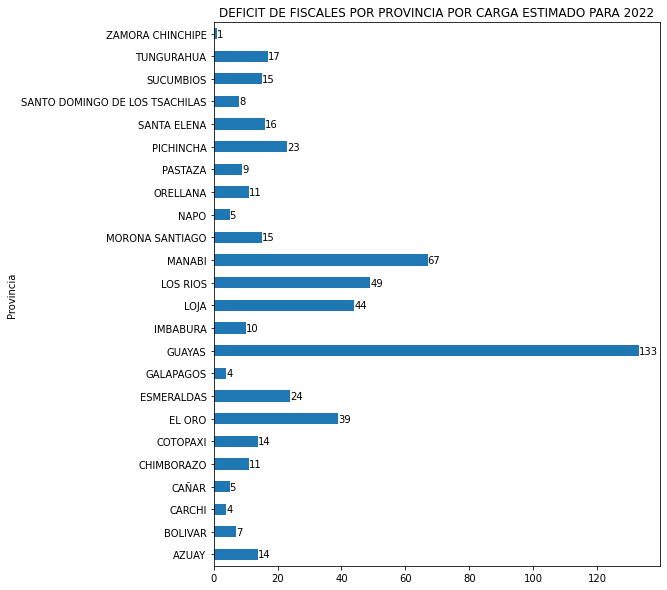

In [181]:
import matplotlib.pyplot as plt
plt.figure()
ax = deficit_provincias.groupby(['Provincia'])['Déficit x Carga'].sum().plot.barh(title='DEFICIT DE FISCALES POR PROVINCIA POR CARGA ESTIMADO PARA 2022', figsize=(8,10))
for contain in ax.containers:
    ax.bar_label(contain)
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\",
                         'provinciasDeficitXCarga2022.png'))

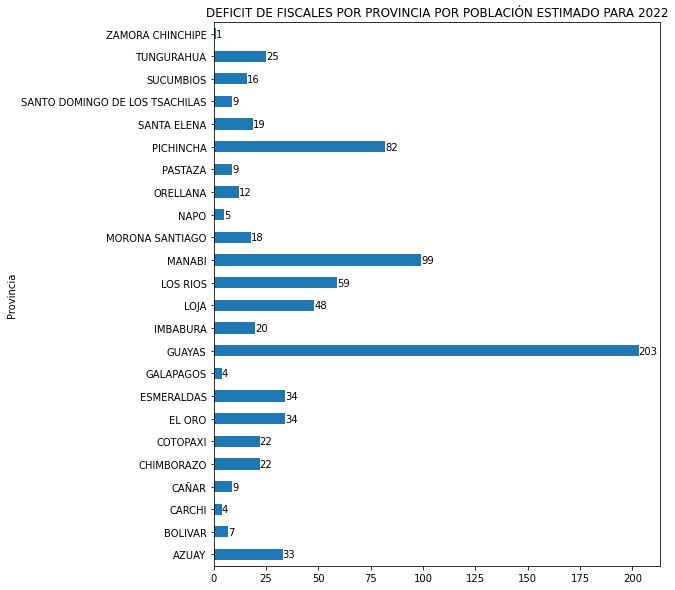

In [182]:
plt.figure()
ax = deficit_provincias.groupby(['Provincia'])['Déficit x Población'].sum().plot.barh(title='DEFICIT DE FISCALES POR PROVINCIA POR POBLACIÓN ESTIMADO PARA 2022', figsize=(8,10))
for contain in ax.containers:
    ax.bar_label(contain)
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\",
                         'provinciasDeficitXPoblacion2022.png'))

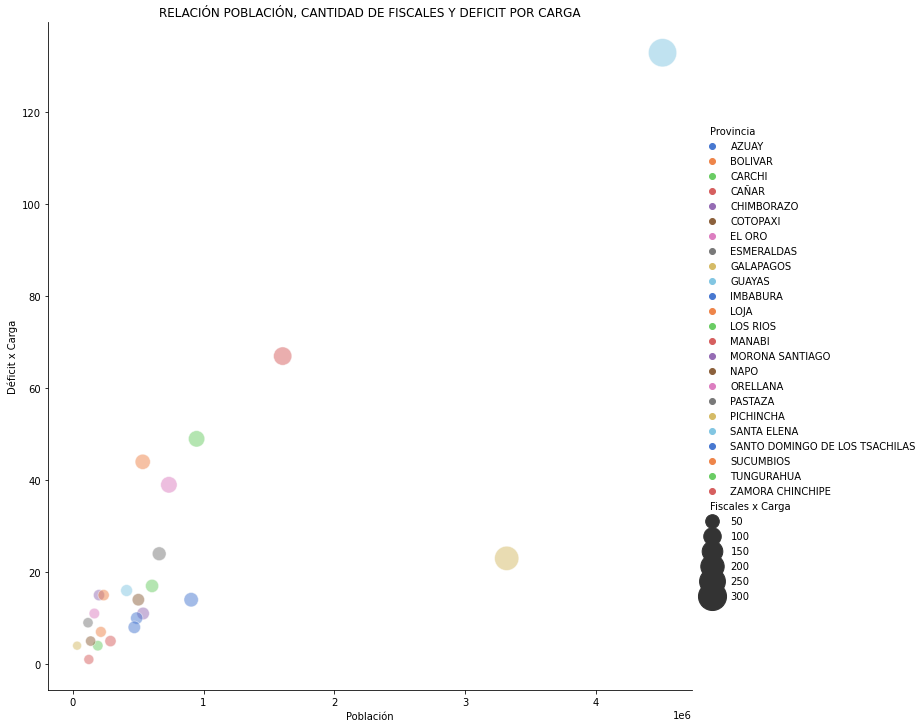

In [186]:
import seaborn as sns
sns.relplot(x='Población', y="Déficit x Carga", size='Fiscales x Carga', data=deficit_provincias, sizes=(80,800), alpha=.5, palette="muted", height=10, hue="Provincia").set(title="RELACIÓN POBLACIÓN, CANTIDAD DE FISCALES Y DEFICIT POR CARGA")
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'relacionCantonesDeficit_Carga.png'))

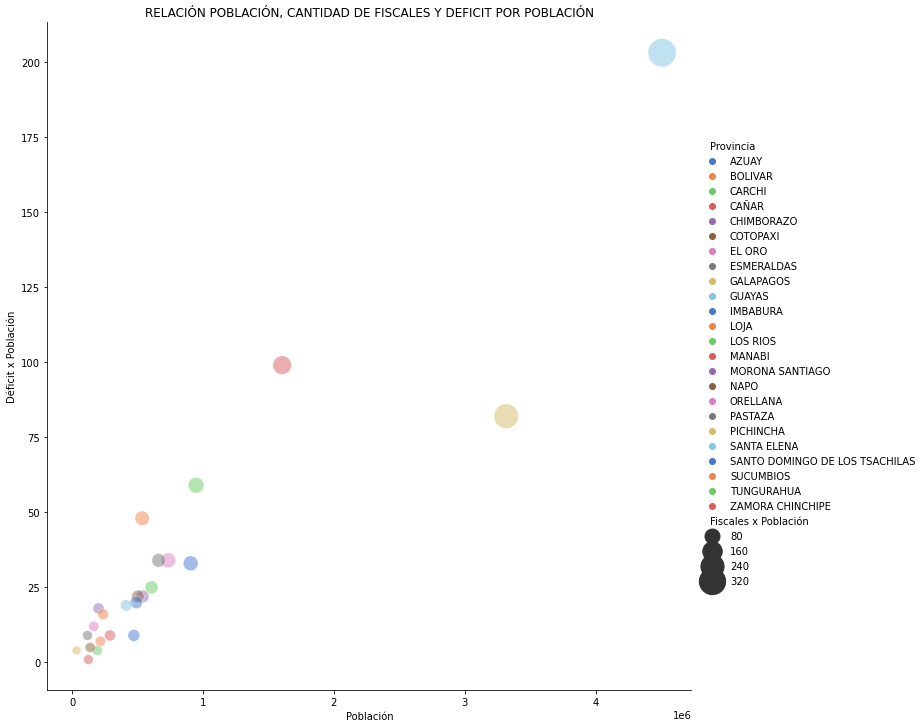

In [187]:
import seaborn as sns
sns.relplot(x='Población', y="Déficit x Población", size='Fiscales x Población', data=deficit_provincias, sizes=(80,800), alpha=.5, palette="muted", height=10, hue="Provincia").set(title="RELACIÓN POBLACIÓN, CANTIDAD DE FISCALES Y DEFICIT POR POBLACIÓN")
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'relacionCantonesDeficit_Carga.png'))